In [1]:
#!pip3 install wordcloud
#!python -m spacy download en
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!pip3 install docx2txt

In [2]:
from spacy.tokens import Span
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from langdetect import detect
import re
from spacy import displacy
import docx2txt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Function to Clean up
def all_data_cleanup(text):
    text = text.replace("|",'')
    input_lines = []
  
    for line in text.split('\n'):
        words = line.split()
        for word in words:
            try:
                lang = detect(line)
            except:
                lang = 'unknown'

   
            if lang not in ['en']:
                input_lines.append(line)
                break
    
    return [item for item in input_lines if item.strip()]

def data_cleanup(input_list, text):
    def is_hindi_string(s):
        hindi_pattern = re.compile(r'[\u0900-\u097F]+')
        s = ' '.join(s.split())
        return bool(hindi_pattern.match(s))

    def check_for_alphanumeric(s):
        pattern = r'[A-Za-z(){}\[\]0-9:;,.?"\'/\-\u00E9\u2018\u2019\u2014*\u2013\u2014\u2014\u2013]'
        temp = re.sub(pattern, '', s)
        if len(temp.strip()) != 0:
            return True
        else:
            return False

    keep = []
    
    for item in input_list:
        if is_hindi_string(item) and item not in keep:
            print(item)
            text = text.replace(item, '')
        if check_for_alphanumeric(item):
            if item not in keep:
                print(item)
                text = text.replace(item, '')
    return text

In [15]:
result = docx2txt.process("DB_Wiki.docx")
out_list = all_data_cleanup(result)
content = data_cleanup(out_list, result)
output_file_path = "output.txt"
with open(output_file_path, 'w', encoding='utf-8') as f:
    f.write(content)

Deutsche Börse AG
Christoph Böhm
Eurex Frankfurt AG (100%)
Eurex Global Derivatives AG (100%)
Deutsche Börse Systems, Inc. (100%)
ISS STOXX GmbH (80.31%)
STOXX Ltd. (100%)
Axioma Inc. (100%)
EPEX SPOT SE (51%)
Herbert Alsheimer: The stock exchange in Frankfurt . Societäts-Verlag, Frankfurt am Main 2006, ISBN 3-7973-0998-8 .
Deutsche Börse: Organisation and working methods – Deutsche Börse AG . Frankfurt am Main 1993, DNB 931655986 .
Website of Deutsche Börse AG
↑ Deutsche Börse now in Eschborn. faz.net , 4 November 2010, accessed on 5 June 2013 .
↑ Annual Report 2020. (PDF) Deutsche Börse, 12 March 2021, accessed on 21 March 2021 .
↑ Trading venues Deutsche Börse Cash Market ( Memento from 24 December 2015 in the Internet Archive ), on deutsche-boerse-cash-market.com
↑ Deutsche Börse Group - Deutsche Börse Group. In: www01.deutsche-boerse.com. Retrieved on 11 August 2016 .
↑ Alexander Hüsing: Deutsche Börse swallows foreign exchange platform 360T. Deutsche Startups , July 27, 2015, acc

In [ ]:
'''db_content = "output.txt"
file = open(db_content, encoding="utf8")
content=file.read()'''

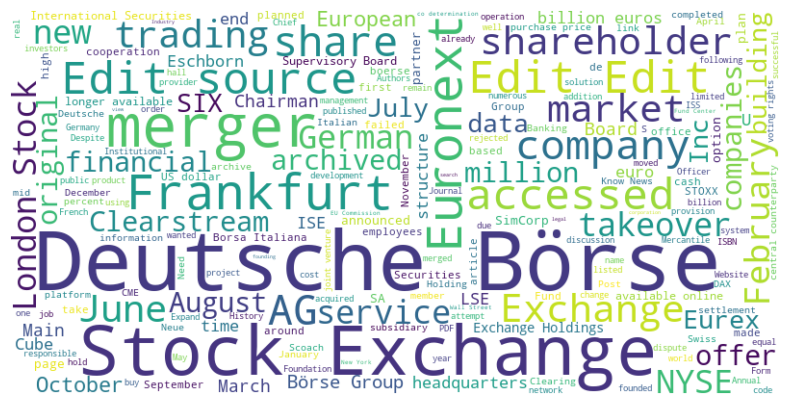

In [17]:
text =content
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [34]:
#Build upon the spaCy Small Model
def call_nlp_0(text):
    nlp = spacy.load("en_core_web_sm")
    #Create the Doc object
    doc = nlp(text)
    for ent in doc.ents:
        print(ent.text, '|' , ent.label_)
    displacy.render(doc, style='ent')

In [36]:
text = "Deutsche Boerse AG has turn over of $35 million , company no (555) 555-5555."
call_nlp_0(text)

Deutsche Boerse AG | ORG
$35 million | MONEY
555 | CARDINAL
555 | CARDINAL


In [54]:
#nlp = spacy.load("en_core_web_sm")
nlp = spacy.blank("en")
ruler = nlp.add_pipe("entity_ruler")
patterns = [
                {"label": "PHONE_NUMBER", "pattern": [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "ddd"},
                {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]}
            ]


ruler.add_patterns(patterns)

def call_nlp(text):
    #Create the Doc object
    doc = nlp(text)
    displacy.render(doc, style='ent')

In [56]:
text = "Deutsche Boerse AG has turn over of $35 million , company no (555) 555-5555."
call_nlp(text)

In [30]:
nlp.analyze_pipes()

{'summary': {'entity_ruler': {'assigns': ['doc.ents',
    'token.ent_type',
    'token.ent_iob'],
   'requires': [],
   'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
   'retokenizes': False}},
 'problems': {'entity_ruler': []},
 'attrs': {'doc.ents': {'assigns': ['entity_ruler'], 'requires': []},
  'token.ent_iob': {'assigns': ['entity_ruler'], 'requires': []},
  'token.ent_type': {'assigns': ['entity_ruler'], 'requires': []}}}

In [32]:
#type(content)
call_nlp_0(content)